# Принятие решений в бизнесе на основе данных(A/B- тесты)

# Описание проекта:

В кчестве аналитика крупного интернет-магазина. Вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
Приоритизируйем гипотезы, запустим A/B-тест и проанализируем результаты.

# Оглавление:

1. [Предобработка данных](#Шаг-1.-Предобработка-данных)
2. [Анализ А/B теста](#Шаг-2.-Анализ-A/B-теста)
3. [Вывод](#Вывод:)

# Шаг-1 выгрузка данных и импорт библиотек.

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import scipy
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial
import math as math
import datetime as dt

## Шаг 2. Выгрузка данных и выбор гипотез.

In [2]:
data=pd.read_csv('/datasets/hypothesis.csv')

In [3]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
data.columns=data.columns.str.lower()

Приоретизируем гипотезы методами ICE и RICE

In [5]:
data['ice']=(
    (data['impact']*data['confidence'])/(data['efforts'])
)

In [6]:
display(data[['hypothesis','ice']].sort_values(by='ice',ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [7]:
data['rice']=(
    (data['reach']*data['impact']*data['confidence'])/(data['efforts'])
)
display(data[['hypothesis','rice']].sort_values(by='rice',ascending=False))

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [8]:
pd.options.display.max_colwidth = 100
data['hypothesis']

0     Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                              Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...
3    Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                       Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5               Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6    Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...
7       Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                Запустить акцию, дающую скидку на товар в день рождения
Name: hypothesis, dtype: object

- Добавить форму подписки на все основные страницы-занимает лидирущую строчку, потому что охват сайта большой и это повлияет на каждого пользователя, по параметрам ICE он занимает 3-ье место.
- Акция со скидкой в день рождения,если будет длиться недолго,то не каждый пользователь ее застанет и гипотеза является малоохватывающей,если не проводить тест условный год)
- Добавить 2 канала привлечения трафика также выгодно по обоим форматам.
- Все лидирующие в первой четверке гипотезы, так и остаются лидерами в обоих Фремворках,но меняют позиции между собой из-за разницы в охвате, так как данные есть, то можем брать любую из них,Я буду работать с Добавлением формы подписки. Очень актуально в наше время и прибыльно,много конкурентов уже это использует( гипотеза номер 7)

## Шаг 2. Анализ A/B-теста

In [9]:
orders=pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [11]:
orders=orders.rename(columns={'transactionId':'order_id','visitorId':'visitor_id'})

In [12]:
orders

,order_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [13]:
orders.head()

,order_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.duplicated().sum()

0

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
order_id      1197 non-null int64
visitor_id    1197 non-null int64
date          1197 non-null datetime64[ns]
revenue       1197 non-null int64
group         1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [16]:
visitors=pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [17]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [18]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [20]:
visitors.duplicated().sum()

0

С данными все в порядке

Разберемся с куммулятивной суммой

In [21]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg(
        {
            'date': 'max',
            'group': 'max',
            'order_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [22]:
ordersAggregated

,date,group,order_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [23]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


In [24]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [25]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Считаем выручку по групапам:

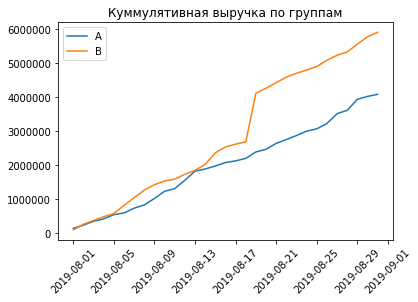

In [26]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Куммулятивная выручка по группам')
plt.xticks(rotation=45)

plt.legend() 


Видим что накопительная сумма группы б возросла резко в середине периода но причина пока не ясна

Построим график кумулятивного среднего чека по группам.

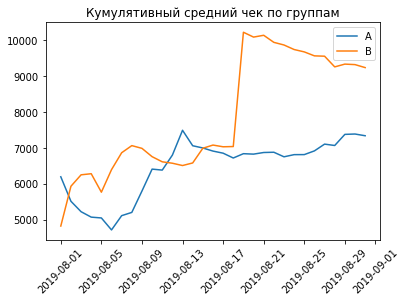

In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=45)
plt.legend() 

такой же подъем наблюдается и у среднего чека достигшего в пике 10к У.Е и опустившийся до 9к

Посчитаем относительную разницу среднего чека

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

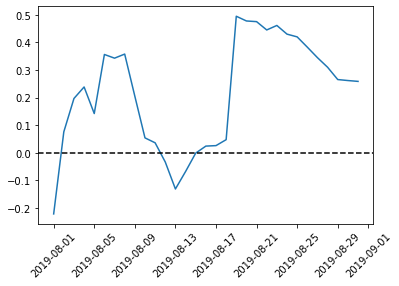

In [29]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)

plt.axhline(y=0, color='black', linestyle='--') 


<a class="anchor" id="21-bullet">

Считаем куммулятивную конверсию

Резкое изменение проиходило дважды раз

In [30]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

Посроим графики

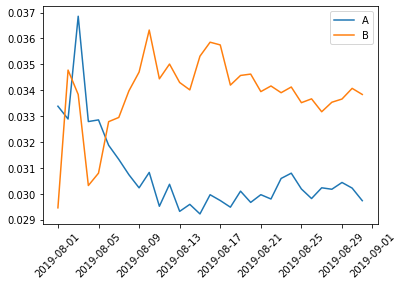

In [31]:


plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()


Конверсия группы б выше.

Я считаю что увеличенная конверсия группы Б вначале была ниже,затем напротяжении месяца , держала верх над группой А. Метрики  так или иначе стабилизировались к середине периода ,в итоге Б лидирует.

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300.]),
 <a list of 8 Text xticklabel objects>)

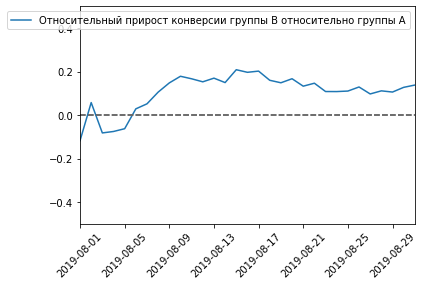

In [32]:
merged_conversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(merged_conversions['date'], merged_conversions['conversionB']/merged_conversions['conversionA']-1,label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5]) 
plt.xticks(rotation=45)

Отчетливо видно как относительный прирост группы Б Держит верх приблизительно на 15% и Графики куммулятивной конверсии это доказывают

Относительная конверсия группы Б больше а на 15%

(сделал шаг 5 а надо 3 4)

#### Подвывод:

Причины падения конверсии и более низкого среднего чека лишь добавляют возможные подтверждения в силу введеной нами гипотезы, также  периоды изменения конверсии были раньше(наше предположение сработало) и как следствие наблюдаем увеличение среднего чека на вторую и третью неделю эксперимента.Группа Б стала более успешной.

Построим точечный график стоимостей заказов. 

In [33]:
orders

,order_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [34]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

In [35]:
ordersByUsers

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [36]:
x_values = pd.Series(range(0,len(ordersByUsers)))

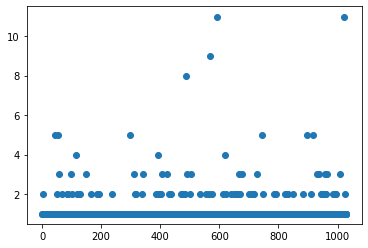

In [37]:
plt.scatter(x_values, ordersByUsers['orders']) 

In [38]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

- не более 5 процентов совершили 2 покупки и 1 процент более 4-ех от общего количества пользователей

In [39]:
orders.sort_values(by='revenue', ascending=False).head(10)



,order_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


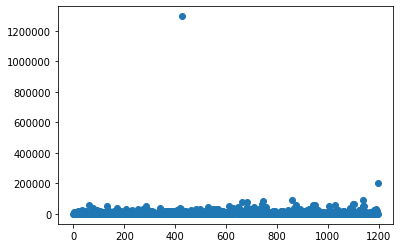

In [40]:
revenue_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(revenue_values, orders['revenue']) 

Видим пару выпадающих значений в 1.3 миллиона и 200 тысяч У.Е

In [41]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

- 5 процентов пользователей покупали заказы на общую сумму более 28000,и лишь 1 процент более 58 000

- чтобы в дальнейшем более точно произвести тест. возьмем 95  процентили. Чтобы избежать ложноположительных результатов в дальнейшем статистическом исследовании.Делая больше порог,повышаем вероятность не добрать p-value,которая поможет отчасти избежать неверных гипотез

In [42]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [43]:
orders

,order_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [44]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [45]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [46]:
data

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


In [47]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


In [48]:
orders

,order_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [49]:
print(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0,index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',),
    ],
    axis=0,
)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Рассмотрим разницу конверсий  данных

Возьмем за гипотезу Н0,что  статистистических различий между конверсиями нет,H1-что  статистистические различия между конверсиями есть

In [50]:
alpha=0.05
print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

if (st.mannwhitneyu(sampleA, sampleB)[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.00840
0.138
Отвергаем нулевую гипотезу


Первое число — p-value = 0.008 и меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет,  отвергаем. Прирост относительный  группы B равен 13.8% 

Считаем статистическую разницу чеков по  данным

Возьмем две гипотезы. 

H0-статистически значимые различия средних чеков отсутсвуют.

H1-статистически значимые различия в чеках есть.

In [51]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

if (st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.365
0.259
Не получилось отвергнуть нулевую гипотезу


 p-value = 0.365>0.05 . Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет,   оставляем. Прирост относительного среднего чека   группы B равен 25.9% 

Почистим данные ,отбросив все после 95% процентиля

In [52]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28001]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
(74,)


- так отсечем 74 пользователей с 95-по 100 процентиль

In [53]:
usersWithManyOrders_99 = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders_99 = orders[orders['revenue'] > 58000]['visitor_id']
abnormalUsers_99 = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers_99.head(5))
print(abnormalUsers_99.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
(74,)


- а так 1 процент аномальных покупок составляет 15 человек

Я предлагаю выбрать 95 процентиль,alpha=0.05

Посчитаем  на очищенных данных относительную разницу конверсии

In [54]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Для очищенных данных по конверсиям:



H0-Конверсии А и Б статистически  не значимы

Н1-Конверсии А и Б статистически   значимы

In [55]:
print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
if (st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.00652
0.173
Отвергаем нулевую гипотезу


p value_также не достигнуто и преимущество у б группы такзже есть и варьируется от 13 до 18 процентов

Посчитаем статистическую значимость средних чеков и относительную разницу:

Гипотезы для конверсий сохраняем те же

H0-Нет статистически значимого различия по среднему чеку между группами 

Н1-Есть статистически значимое различие по среднему чеку между группами 


In [56]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],orders[np.logical_and(orders['group'] == 'B',
                                                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),) ]['revenue'],
        )[1]
    )
)

print("{0:.3f}".format(orders[ np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 
if (st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],orders[np.logical_and(orders['group'] == 'B',
                                                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),) ]['revenue'],
        )[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.369
-0.020
Не получилось отвергнуть нулевую гипотезу


Средний чек упал на 2 процента, но  p value практически не изменилось

Вывод: По «сырым» данным различий в конверсии групп A и B нет.
Первое число — p-value = 0.441 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем. Однако относительный проигрыш группы B равен 10.2% — второе число в выводе.

# Вывод:

- Есть статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы А хуже группы Б и нет значительной тенденции к улучшению
- В какой то период Средний чек уменьшился у группы б, но с течением времени уеличился и стал больше на 30 процентов  к концу периода.
- Конверсия группы B увеличилась и втечение 3 недель была выше 15 процентов

['2019-08-01', '2019-08-31', -0.5, 0.5]

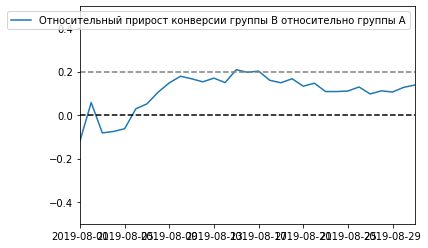

In [57]:
plt.plot(merged_conversions['date'], merged_conversions['conversionB']/merged_conversions['conversionA']-1,label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5]) 

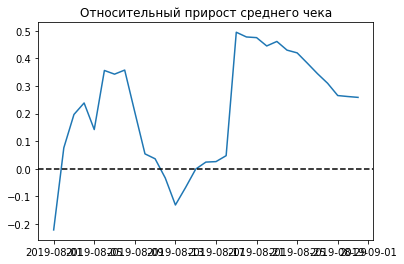

In [58]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительный прирост среднего чека')

plt.axhline(y=0, color='black', linestyle='--') 


Мы проверяли гипотезу на внедерния подписок и все выглядит логично, Людей переходит все больше, подписка удешевляет формат покупок,в какой то период происходит снижение цены,но потом обороты набираются

- Решение- Остановить тест, месячный тест можно считать успешным, так как конверсия стала выше начиная с 1 недели и до конца на 17%, а по среднему чеку ,если не знать причину недельного спада, нельзя,несмотря на тендецию роста потом.

Итого внедерние подписок оказалось выгодным!